# **How to calculate stock returns in Python**

In [64]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt

### **Downloading the stock price for Netflix**

Netflix has seen phenomenal growth since 2009. It was responsible for producing a new category of business - subscription based online streaming. It has changed the industry landscape and Old media companies like CBS, Fox, Viacom, Disney etc are under threat from the new way of consuming media. 

Netflix started as a content delivery platform, but today its responsible for content creation as well. Today Netflix seems like an unstoppable force in the media landscape.

In [65]:
company_name = 'NFLX'
netflix = data.DataReader(company_name,'yahoo',start = "2009-04-01",end = "2020-04-01")
print(netflix.head())

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2009-04-01  6.282857  6.017143  6.111429  6.124286  10427900.0   6.124286
2009-04-02  6.275714  6.141428  6.252857  6.161428  11048800.0   6.161428
2009-04-03  6.264286  6.081429  6.152857  6.152857   7205800.0   6.152857
2009-04-06  6.377143  6.100000  6.141428  6.357143  12506900.0   6.357143
2009-04-07  6.414286  6.227143  6.350000  6.242857   8216600.0   6.242857


### **Charting the Netflix’s Adjusted Closing Price**

The adjusted closing price of a stock takes into account dividend payments, splits and other factor which directly influence overall return. Comparing the adjusted closing prices for a single stock over a specific duration of time will allow you to identify its return.

Therefore, we are going to deal with Adjusted Closing Price only

Date
2009-04-01      6.124286
2009-04-02      6.161428
2009-04-03      6.152857
2009-04-06      6.357143
2009-04-07      6.242857
                 ...    
2020-03-26    362.989990
2020-03-27    357.119995
2020-03-30    370.959991
2020-03-31    375.500000
2020-04-01    364.079987
Name: Adj Close, Length: 2770, dtype: float64


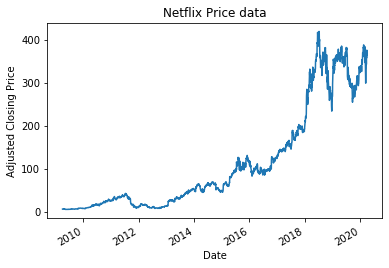

In [66]:
netflix_data = netflix['Adj Close'].fillna(method='ffill')
print(netflix_data)
netflix_data.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Netflix Price data")
plt.show()

### **Calculating the daily and monthly returns for individual stock**

In [67]:
netflix_daily_returns = netflix_data.pct_change()
netflix_monthly_returns =  netflix_data.resample('M').ffill().pct_change()

[**Pandas Series: pct_change() function**](https://www.w3resource.com/pandas/series/series-pct_change.php)
Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.

In [68]:
print(netflix_daily_returns.head())

Date
2009-04-01         NaN
2009-04-02    0.006065
2009-04-03   -0.001391
2009-04-06    0.033202
2009-04-07   -0.017978
Name: Adj Close, dtype: float64


In [69]:
print(netflix_monthly_returns.head())

Date
2009-04-30         NaN
2009-05-31   -0.129993
2009-06-30    0.048706
2009-07-31    0.062893
2009-08-31   -0.007055
Freq: M, Name: Adj Close, dtype: float64


### **Charting the daily returns and monthly returns for Netflix**

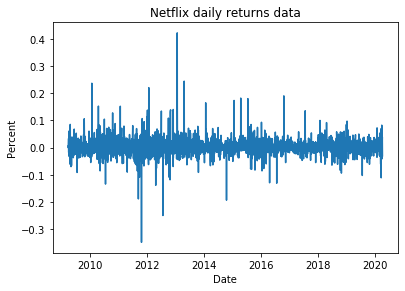

In [70]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

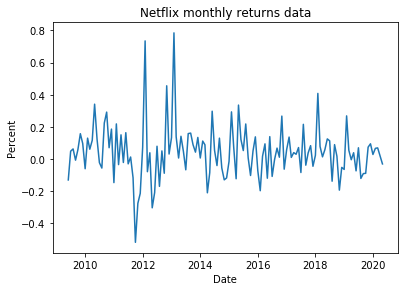

In [71]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix monthly returns data")
plt.show()

After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 5% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

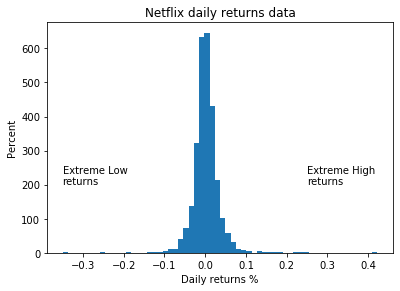

In [72]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

### **Calculating the cumulative returns for the Netflix stock**

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of the investment or in other words, calculating the total returns from the investment, we need to calculate the cumulative returns from that investment. 

For that we will use the **cumprod()** function.

In [73]:
netflix_daily_cum_returns = (netflix_daily_returns + 1).cumprod()
print(netflix_daily_cum_returns.head())

Date
2009-04-01         NaN
2009-04-02    1.006065
2009-04-03    1.004665
2009-04-06    1.038022
2009-04-07    1.019361
Name: Adj Close, dtype: float64


### **Charting the cumulative returns of Netflix**

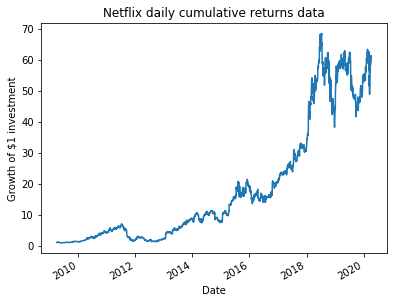

In [74]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

This chart shows the cumulative returns since 2009 for Netflix.

In [75]:
netflix_monthly_cum_returns = (netflix_monthly_returns + 1).cumprod()
print(netflix_monthly_cum_returns.head())

Date
2009-04-30         NaN
2009-05-31    0.870007
2009-06-30    0.912381
2009-07-31    0.969764
2009-08-31    0.962922
Freq: M, Name: Adj Close, dtype: float64


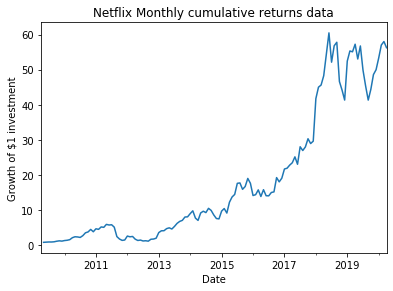

In [76]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_monthly_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix Monthly cumulative returns data")
plt.show()

We can visualize that the monthly returns chart is much more smoother than the daily chart.

## **Statistical Data for Netflix**

### **Calculating the Mean,Rolling Mean for 20 days, Rolling Mean for 200 days and Standard deviation**

In [77]:
netflix_short_rolling = netflix_data.rolling(window=20).mean()
netflix_long_rolling = netflix_data.rolling(window=200).mean()
print(netflix_short_rolling)
print(netflix_long_rolling)

Date
2009-04-01           NaN
2009-04-02           NaN
2009-04-03           NaN
2009-04-06           NaN
2009-04-07           NaN
                 ...    
2020-03-26    348.918498
2020-03-27    348.322998
2020-03-30    347.818498
2020-03-31    348.154999
2020-04-01    347.169498
Name: Adj Close, Length: 2770, dtype: float64
Date
2009-04-01           NaN
2009-04-02           NaN
2009-04-03           NaN
2009-04-06           NaN
2009-04-07           NaN
                 ...    
2020-03-26    322.478249
2020-03-27    322.536049
2020-03-30    322.673699
2020-03-31    322.852549
2020-04-01    322.919849
Name: Adj Close, Length: 2770, dtype: float64


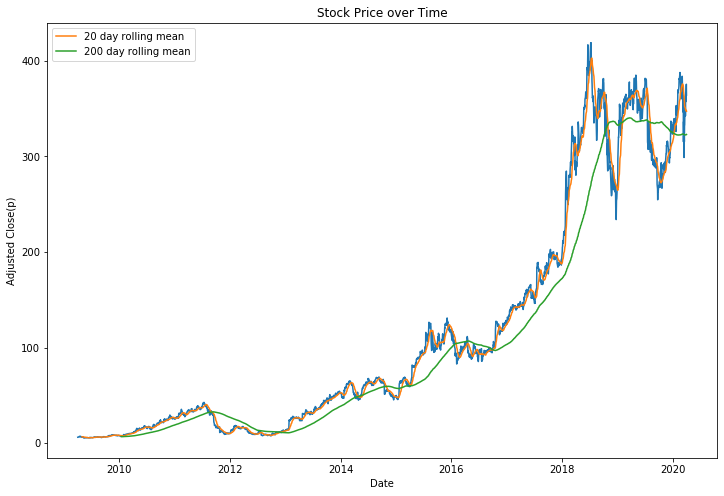

In [78]:
plt.subplots(figsize=(12,8))
plt.plot(netflix_data)
plt.plot(netflix_short_rolling,label='20 day rolling mean')
plt.plot(netflix_long_rolling,label='200 day rolling mean')
plt.xlabel('Date')
plt.ylabel('Adjusted Close(p)')
plt.legend()
plt.title('Stock Price over Time')
plt.show()

In [79]:
print(netflix_monthly_returns.mean())

0.0437295464538035


In [80]:
print(netflix_monthly_returns.std())

0.16596419788870878


## **Multiple stocks**

### **Downloading stock market data for multiple stocks**

We can download the financial data for multiple stocks. We first assign the stock symbols to a variable named “tickers”", and use that to download the stock prices.

In [81]:
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
multpl_stocks = data.DataReader(tickers,'yahoo',start = "2013-01-01",end = "2018-03-01")

### **Charting the stock prices for multiple stocks**

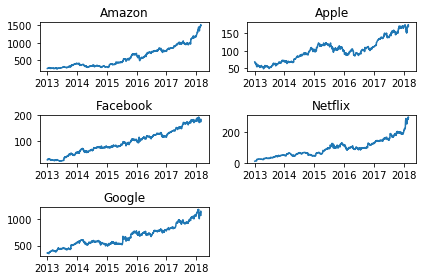

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['AMZN'])
ax1.set_title("Amazon")
ax2.plot(multpl_stocks['Adj Close']['AAPL'])
ax2.set_title("Apple")
ax3.plot(multpl_stocks['Adj Close']['FB'])
ax3.set_title("Facebook")
ax4.plot(multpl_stocks['Adj Close']['NFLX'])
ax4.set_title("Netflix")
ax5.plot(multpl_stocks['Adj Close']['GOOG'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### **Calculating the returns for multiple stocks**

<Figure size 432x288 with 0 Axes>

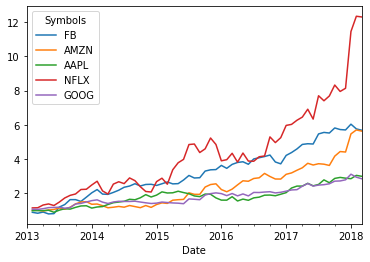

In [83]:
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()

fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

Not surprisingly, Netflix had the best returns since 2013. Amazon and Facebook come in distant second and third. 

## **Statistical Data for Multiple Stocks**

### **Calculating the Mean,Rolling Mean for 20 days, Rolling Mean for 200 days and Standard deviation**

In [87]:
multpl_stock_monthly_returns_short_rolling = multpl_stock_monthly_returns.rolling(window=20).mean()
multpl_stock_monthly_returns_long_rolling = multpl_stock_monthly_returns.rolling(window=200).mean()
print(multpl_stock_monthly_returns_short_rolling)
print(multpl_stock_monthly_returns_long_rolling)

Symbols           FB      AMZN      AAPL      NFLX      GOOG
Date                                                        
2013-01-31       NaN       NaN       NaN       NaN       NaN
2013-02-28       NaN       NaN       NaN       NaN       NaN
2013-03-31       NaN       NaN       NaN       NaN       NaN
2013-04-30       NaN       NaN       NaN       NaN       NaN
2013-05-31       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2017-11-30  0.023534  0.036275  0.026819  0.035420  0.016979
2017-12-31  0.021806  0.030411  0.033053  0.042555  0.021688
2018-01-31  0.024238  0.037652  0.028932  0.055996  0.024510
2018-02-28  0.023852  0.040269  0.034475  0.065301  0.024688
2018-03-31  0.018958  0.036623  0.029096  0.065257  0.017554

[63 rows x 5 columns]
Symbols     FB  AMZN  AAPL  NFLX  GOOG
Date                                  
2013-01-31 NaN   NaN   NaN   NaN   NaN
2013-02-28 NaN   NaN   NaN   NaN   NaN
2013-03-31 NaN   NaN   NaN  

In [89]:
print(multpl_stock_monthly_returns.mean())

Symbols
FB      0.031927
AMZN    0.031256
AAPL    0.019912
NFLX    0.048539
GOOG    0.018512
dtype: float64


In [90]:
print(multpl_stock_monthly_returns.std())

Symbols
FB      0.089655
AMZN    0.080196
AAPL    0.065583
NFLX    0.125295
GOOG    0.057129
dtype: float64


**Calculating the correlation and covariance using pandas**

In [91]:
print(multpl_stock_monthly_returns.corr())

Symbols        FB      AMZN      AAPL      NFLX      GOOG
Symbols                                                  
FB       1.000000  0.201918  0.186499  0.232284  0.267023
AMZN     0.201918  1.000000  0.299473  0.477157  0.629816
AAPL     0.186499  0.299473  1.000000  0.243286  0.217208
NFLX     0.232284  0.477157  0.243286  1.000000  0.454531
GOOG     0.267023  0.629816  0.217208  0.454531  1.000000


In [92]:
print(multpl_stock_monthly_returns.cov())

Symbols        FB      AMZN      AAPL      NFLX      GOOG
Symbols                                                  
FB       0.008038  0.001452  0.001097  0.002609  0.001368
AMZN     0.001452  0.006431  0.001575  0.004795  0.002886
AAPL     0.001097  0.001575  0.004301  0.001999  0.000814
NFLX     0.002609  0.004795  0.001999  0.015699  0.003254
GOOG     0.001368  0.002886  0.000814  0.003254  0.003264
